In [19]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [21]:
# In case you use your GPU, Get Acceleration engine
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [1]:
# In case you use your GPU, we might encounter some bugs That is why we should uninstall the previous package and update modules
# !pip install cupy-cuda12x
# !python -m pip install -U setuptools pip
# !pip install cupy-cuda12x

In [5]:
# parallel processing
!pip install dask

In [ ]:
# In case you use your GPU, As we want to use GPU for paralllel processing, we will use some dependancies for acceleration like dask.delayed/compute
!pip install modin[dask] # Modin is similar to pandas but more efficient

In [17]:
# In case you use your GPU and you will use TensorFlow for GPU acceleration

# We will use tensorflow for image processing(image resizing) if we use GPU
# import tensorflow as tf

In [18]:
# In case you use your GPU/CPU to make stuffs like pandas but with GPU
import modin.pandas as mpd

In [ ]:
# In case you use your CPU
# import pandas as pd

In [26]:
# In case you use your GPU and you will use CuPy for GPU acceleration

# Note: importing cuda might get the wrong import name or version
# If so try to look for documentation and  install with : !pip install cupy_cudaxxx
# Note that cupy requires numpy and  it has almost the same API as numpy
# import cupy as cp

In [6]:
# In case for parallel processing whether for CPU or GPU
import dask
from dask import delayed, compute

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
import os
import glob
from keras.preprocessing.image import ImageDataGenerator
from concurrent.futures import ThreadPoolExecutor

import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications import ResNet50

In [8]:
# In case you are working with Collab, get connection to Google Drive and mount it to 'drive' folder
drive.mount('drive/')

Mounted at drive/


In [9]:
# Check if Google Drive is connected to navigate to the targeted folder
!ls "drive/MyDrive/School/HETIC/MD4/Neural_Network/sample_3"

cnn_hematie_classification.ipynb  data_set


In [10]:
# Get the project folder path
project_path = "drive/MyDrive/School/HETIC/MD4/Neural_Network/sample_3"
# Make it into the current working space
os.chdir(project_path)

In [11]:
# Check if we are in the current project folder to get the "data_set"
!ls "data_set"

parasitized  uninfected


In [24]:
# Optimization V2: with "dask" parallele processing read/write like Async -> Await in Javascript
def get_dataset_paths(dataset_path, safe_path, parasited_path):
    path = os.path

    # Use Dask's delayed to parallelize glob operations
    parasited_list_futures = delayed(glob.glob)(path.join(dataset_path, parasited_path, '*.png'))
    safe_list_futures = delayed(glob.glob)(path.join(dataset_path, safe_path, '*.png'))

    # Compute the tasks in parallel
    img_safe_paths, img_parasited_paths = compute(parasited_list_futures, safe_list_futures, scheduler='threads')

    print(f'{img_parasited_paths}')
    print(f'{img_safe_paths}')

    return img_safe_paths, img_parasited_paths

In [14]:
# Optimization V1: code for native parallele processing read/write like Async -> Await in Javascript
# def get_dataset_paths(dataset_path, safe_path, parasited_path):
#     path = os.path

#     # Define the glob patterns
#     parasited_glob_pattern = path.join(dataset_path, parasited_path, '*.png')
#     safe_glob_pattern = path.join(dataset_path, safe_path, '*.png')

#     # Use ThreadPoolExecutor for parallel file I/O
#     with ThreadPoolExecutor() as executor:
#         future_parasited_paths = executor.submit(glob.glob, parasited_glob_pattern)
#         future_safe_paths = executor.submit(glob.glob, safe_glob_pattern)

#         # Retrieve the results
#         img_parasited_paths = future_parasited_paths.result()
#         img_safe_paths = future_safe_paths.result()

#     print(f'{img_parasited_paths}')
#     print(f'{img_safe_paths}')

#     return img_safe_paths, img_parasited_paths

In [ ]:
# Without optmization
# def get_dataset_paths(dataset_path, safe_path, parasited_path ):
#   path = os.path
#   img_parasited_paths = glob.glob(path.join(dataset_path, parasited_path, '*.png'))
#   img_safe_paths = glob.glob(path.join(dataset_path, safe_path, '*.png'))

#   print(f'{img_parasited_paths}')
#   print(f'{img_safe_paths}')

#   return img_safe_paths, img_parasited_paths


In [25]:
# Define our folders variables
dataset_path = "data_set"
safe_path = "uninfected"
parasited_path = "parasitized"
img_safe_paths, img_parasited_paths = get_dataset_paths(dataset_path, safe_path, parasited_path)

['data_set/uninfected/image_25462.png', 'data_set/uninfected/image_25537.png', 'data_set/uninfected/image_25561.png', 'data_set/uninfected/image_25493.png', 'data_set/uninfected/image_25476.png', 'data_set/uninfected/image_25508.png', 'data_set/uninfected/image_25593.png', 'data_set/uninfected/image_25592.png', 'data_set/uninfected/image_25495.png', 'data_set/uninfected/image_25606.png', 'data_set/uninfected/image_25611.png', 'data_set/uninfected/image_25584.png', 'data_set/uninfected/image_25459.png', 'data_set/uninfected/image_25568.png', 'data_set/uninfected/image_25609.png', 'data_set/uninfected/image_25555.png', 'data_set/uninfected/image_25575.png', 'data_set/uninfected/image_25523.png', 'data_set/uninfected/image_25513.png', 'data_set/uninfected/image_25514.png', 'data_set/uninfected/image_25465.png', 'data_set/uninfected/image_25501.png', 'data_set/uninfected/image_25544.png', 'data_set/uninfected/image_25565.png', 'data_set/uninfected/image_25614.png', 'data_set/uninfected/ima

In [ ]:
# With GPU using CV2 and TensorFlow to resize image
# def load_and_resize_image_tf(image_path):
#     image = cv2.imread(image_path)
#     image_tensor = tf.convert_to_tensor(image)
#     resized_image = tf.image.resize(image_tensor, [128, 128]).numpy().astype(np.uint8)
#     return resized_image

In [ ]:
# With GPU using TensorFlow
# def get_prepared_data(img_safe_list, img_parasited_list, labels=["uninfected", "parasitized"]):
#     # Limit the sample to 500 due to time complexity
#     img_parasited_list = img_parasited_list[:500]
#     img_safe_list = img_safe_list[:500]

#     # Read images in parallel using ThreadPoolExecutor
#     with ThreadPoolExecutor() as executor:
#         safe_list_futures = [executor.submit(load_and_resize_image_tf, image_path) for image_path in img_safe_list]
#         parasited_list_futures = [executor.submit(load_and_resize_image_tf, image_path) for image_path in img_parasited_list]
#
#     safe_list = [future.result() for future in safe_list_futures]
#     parasited_list = [future.result() for future in parasited_list_futures]
#
#     # Encode labels
#     # 0 for safe
#     # 1 for parasited
#     label_safe_list = [0] * len(safe_list)
#     label_parasited_list = [1] * len(parasited_list)

#     # Create dataframes in parallel using ThreadPoolExecutor
#     with ThreadPoolExecutor() as executor:
#         future_df_parasitized = executor.submit(mpd.DataFrame, {
#             'Images': parasited_list,
#             'Labels': label_parasited_list
#         })
#         future_df_uninfected = executor.submit(mpd.DataFrame, {
#             'Images': safe_list,
#             'Labels': label_safe_list
#         })

#         # Retrieve the dataframes
#         df_parasitized = future_df_parasitized.result()
#         df_uninfected = future_df_uninfected.result()

#     # Concatenate the dataframes
#     df = mpd.concat([df_parasitized, df_uninfected], ignore_index=True)
#
#     # We will normalize 0-255 to 0-1(meaning 0 to 100%, useful for stocastic vectors)
#     df['Images'] = df['Images'] / 255.0

#     # Shuffle the data
#     df = df.sample(frac=1).reset_index(drop=True)

#     return df

In [ ]:
# With GPU using CuPy
# def load_and_resize_image_cp(image_path):
#     # Load image using OpenCV
#     image = cv2.imread(image_path)  # CPU operation
#     #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert GrayScale to RGB
#     # Transfer image to GPU using CuPy
#     image_gpu = cp.asarray(image)
#     # Resize image on GPU
#     image_resized = cp.resize(image_gpu, (160, 160, 3))
#     return image_resized

In [ ]:
# With GPU using CuPy
# def get_prepared_data(img_safe_list, img_parasited_list, labels=["uninfected", "parasitized"]):
#     # Limit the sample to 500 due to time complexity
#     img_safe_list = img_safe_list[:500]
#     img_parasited_list = img_parasited_list[:500]

#     # Use Dask to parallelize image loading and resizing
#     safe_list_futures = [delayed(load_and_resize_image_cp)(image_path) for image_path in img_safe_list]
#     parasited_list_futures = [delayed(load_and_resize_image_cp)(image_path) for image_path in img_parasited_list]

#     # Compute the tasks in parallel
#     safe_list = compute(*safe_list_futures, scheduler='threads')
#     parasited_list = compute(*parasited_list_futures, scheduler='threads')

#     # Convert lists to CuPy arrays for GPU processing
#     safe_list = cp.array(safe_list)
#     parasited_list = cp.array(parasited_list)

#     # Encode labels
#     label_safe_list = [0] * len(safe_list)
#     label_parasited_list = [1] * len(parasited_list)

#     # Create DataFrames
#     df_parasitized = mpd.DataFrame({
#         'Images': parasited_list.tolist(),
#         'Labels': label_parasited_list
#     })
#     df_uninfected = mpd.DataFrame({
#         'Images': safe_list.tolist(),
#         'Labels': label_safe_list
#     })

#     df = mpd.concat([df_parasitized, df_uninfected], ignore_index=True)

#     # We will normalize 0-255 to 0-1(meaning 0 to 100%, useful for stocastic vectors)
#     df['Images'] = df['Images'] / 255.0

#     # Shuffle the data
#     df = df.sample(frac=1).reset_index(drop=True)

#     return df

In [29]:
# With CPU using CV2
def load_and_resize_image(image_path):
    image = cv2.imread(image_path)
    return cv2.resize(image, (128, 128))

In [44]:
# With CPU
def get_prepared_data(img_safe_list, img_parasited_list, labels=["uninfected", "parasitized"]):
    # Limit the sample to 500 due to time complexity
    img_parasited_list = img_parasited_list[:500]
    img_safe_list = img_safe_list[:500]

    # Read images in parallel using ThreadPoolExecutor
    # with ThreadPoolExecutor() as executor:
    #     safe_list_futures = list(executor.map(load_and_resize_image, img_parasited_list))
    #     parasited_list_futures = list(executor.map(load_and_resize_image, img_safe_list))

    # safe_list = [future.result() for future in safe_list_futures]
    # parasited_list = [future.result() for future in parasited_list_futures]

    # Use Dask to parallelize image loading and resizing
    safe_list_futures = [delayed(load_and_resize_image)(image_path) for image_path in img_safe_list]
    parasited_list_futures = [delayed(load_and_resize_image)(image_path) for image_path in img_parasited_list]

    # Compute the tasks in parallel
    parasited_list = compute(*parasited_list_futures, scheduler='threads')
    safe_list = compute(*safe_list_futures, scheduler='threads')

    # Encode labels
    label_safe_list = [0] * len(safe_list)
    label_parasited_list = [1] * len(parasited_list)

    # Create DataFrames using Modin
    # or pd.DataFrame for pandas
    df_parasitized = mpd.DataFrame({
        'Images': parasited_list,
        'Labels': label_parasited_list
    })
    df_uninfected = mpd.DataFrame({
        'Images': safe_list,
        'Labels': label_safe_list
    })

    # Concatenate the dataframes
    # or pd.DataFrame for pandas
    df = mpd.concat([df_parasitized, df_uninfected], ignore_index=True)

    # We will normalize 0-255 to 0-1(meaning 0 to 100%, useful for stocastic vectors)
    df['Images'] = df['Images'] / 255.0

    # Shuffle the data and ignore index order
    df = df.sample(frac=1, random_state=3, ignore_index=True)

    return df

In [45]:
df = get_prepared_data(img_safe_paths, img_parasited_paths)
df


,Images,Labels
642,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
762,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
909,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
199,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",1
586,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
...,...,...
952,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
643,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
249,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",1
664,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0


In [70]:
# Display Image
def display_sample(data_frame=df,images=[], is_augmented=False):
  plt.figure(figsize=(10, 10))
  i = 0
  image_key = 'Images'
  label_key = 'Labels'
  if is_augmented:
    image_key = 0
    label_key = 1
    df_images, df_labels = next(data_frame)
    data_frame = [df_images, df_labels]

  for image_index in images:
    plt.subplot(3, 3, i + 1)
    plt.imshow(data_frame[image_key][image_index])
    plt.title(f'Status: {"Parasited" if data_frame[label_key][image_index] == 1 else "Safe" }')
    plt.axis('off')
    i += 1
    if i % len(images) == 0:
        break
  plt.tight_layout()
  plt.show()

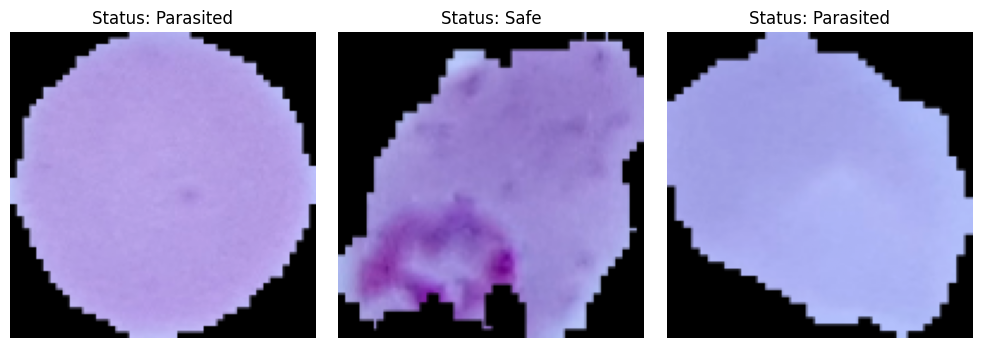

In [72]:
display_sample(df,images=[2,590,7])

In [55]:
df[['Images']].head()

,Images
642,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
762,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
909,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
199,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
586,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."


In [56]:
# Extract features (X) and labels (y) from the DataFrame
X = df['Images']
y = df['Labels']

In [57]:
# Let's split data with train and test
# As we already did the shuffle on our df, we won't let the test_train_split do it
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=False)

In [58]:
# Data Augmentation

# Convert X_train and X_test to numpy arrays
x_train_array = np.array(x_train.tolist())  # Convert DataFrame to list to array
x_test_array = np.array(x_test.tolist())

y_train_array = np.array(y_train.tolist())  # Convert DataFrame to list to array
y_test_array = np.array(y_test.tolist())

# Reshape X_train and X_test if necessary (e.g., if they are grayscale images)
# X_train_array = X_train_array.reshape(-1, height, width, channels)
# X_test_array = X_test_array.reshape(-1, height, width, channels)

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Create generator for training data
train_gen = datagen.flow(x_train_array, y_train_array, batch_size=64, seed=16)

# Create generator for validation data without augmentation
val_datagen = ImageDataGenerator()
val_gen = val_datagen.flow(x_test_array, y_test_array, batch_size=64, seed=16)

In [65]:
# Get values images and labels from train_gen
x_batch, y_batch = next(train_gen)
index_img = 7
f'Image {index_img} is {"Safe" if y_batch[index_img] == 0 else "Parasited"}'

'Image 7 is Parasited'

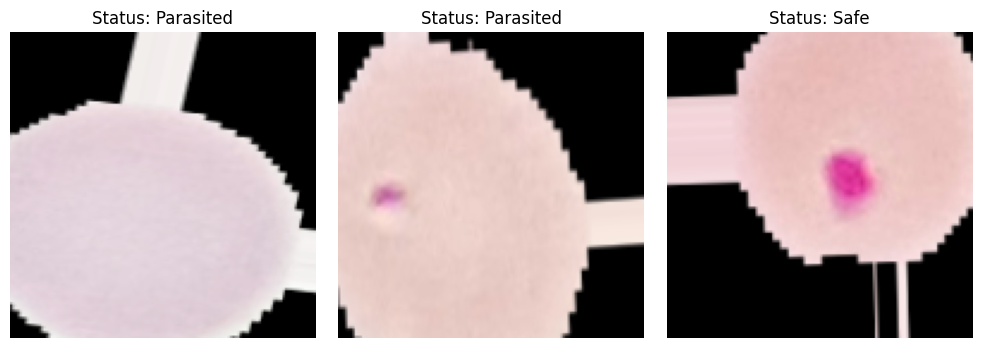

In [71]:
# Display Augmented Images
display_sample(train_gen,images=[2,3,7], is_augmented=True)

In [76]:
# Callback Functions
callbacks = [
    keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=2, monitor='val_loss'), # Learning rate
    keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True) # Early Stopping
]
optimizer = 'adam'

In [77]:
# Model With Sequential From Scratch
model_scratch = keras.Sequential(
  [
      # Feature learning ~ Encoder
      keras.Input(shape=(128, 128, 3)),
      keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"),
      keras.layers.MaxPooling2D(pool_size=(2,2)),

      keras.layers.Dropout(0.3),

      keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"),
      keras.layers.MaxPooling2D(pool_size=(2,2)),

      keras.layers.Dropout(0.3),

      # connexion encoder <-> classifier
      keras.layers.Flatten(),

      # Classifier ~ Fully connected
      keras.layers.Dense(1, activation="sigmoid")

  ]
)

model_scratch.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 32)       

In [78]:
# Compiling the model
model_scratch.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [79]:
history_scratch = model_scratch.fit(train_gen,
                          validation_data=val_gen,
                          epochs=30,
                          callbacks=callbacks
                        )

Epoch 1/30


INFO:distributed.utils_perf:full garbage collection released 187.36 MiB from 95546 reference cycles (threshold: 9.54 MiB)


11/11 [==============================] - 26s 2s/step - loss: 0.7799 - accuracy: 0.4914 - val_loss: 0.6905 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/30
11/11 [==============================] - 20s 2s/step - loss: 0.6898 - accuracy: 0.5171 - val_loss: 0.6928 - val_accuracy: 0.5200 - lr: 0.0010
Epoch 3/30
11/11 [==============================] - 20s 2s/step - loss: 0.6890 - accuracy: 0.5571 - val_loss: 0.6925 - val_accuracy: 0.5167 - lr: 0.0010
Epoch 4/30
11/11 [==============================] - 23s 2s/step - loss: 0.6857 - accuracy: 0.5743 - val_loss: 0.6920 - val_accuracy: 0.5333 - lr: 1.0000e-04


In [80]:
# Model Transfert Learning VGG16
encoder_vgg = VGG16(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
encoder_vgg.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [81]:
# Verifying the summary
encoder_vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [82]:
model_vgg = keras.Sequential(
    [
        # VGG16 is already Pretrained on ImageNet
        encoder_vgg,

        # connexion encoder <-> classifier
        keras.layers.Flatten(),

        # Classifier ~ Fully connected
        keras.layers.Dense(1, activation="sigmoid")
    ]
)

model_vgg.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8193      
                                                                 
Total params: 14722881 (56.16 MB)
Trainable params: 8193 (32.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [83]:
# Compiling the model
model_vgg.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [84]:
history_vgg = model_vgg.fit(train_gen,
                          validation_data=val_gen,
                          epochs=30,
                          callbacks=callbacks
                        )

Epoch 1/30
11/11 [==============================] - 225s 21s/step - loss: 0.6188 - accuracy: 0.6500 - val_loss: 0.5321 - val_accuracy: 0.7433 - lr: 0.0010
Epoch 2/30
11/11 [==============================] - 239s 22s/step - loss: 0.5171 - accuracy: 0.7814 - val_loss: 0.5899 - val_accuracy: 0.6500 - lr: 0.0010
Epoch 3/30
11/11 [==============================] - 232s 22s/step - loss: 0.4547 - accuracy: 0.8014 - val_loss: 0.5497 - val_accuracy: 0.6800 - lr: 0.0010
Epoch 4/30
11/11 [==============================] - 212s 20s/step - loss: 0.4304 - accuracy: 0.8243 - val_loss: 0.4763 - val_accuracy: 0.7433 - lr: 1.0000e-04
Epoch 5/30
11/11 [==============================] - 234s 22s/step - loss: 0.4050 - accuracy: 0.8486 - val_loss: 0.4260 - val_accuracy: 0.7900 - lr: 1.0000e-04
Epoch 6/30
11/11 [==============================] - 220s 21s/step - loss: 0.4104 - accuracy: 0.8471 - val_loss: 0.4404 - val_accuracy: 0.7767 - lr: 1.0000e-04
Epoch 7/30
11/11 [==============================] - 218s 2

In [85]:
# Model Transfert Learning ResNet50
# Load ResNet50 pretrained on ImageNet
encoder_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
encoder_resnet.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [86]:
model_resnet = keras.Sequential(
    [
        # ResNet50 is already Pretrained on ImageNet
        encoder_resnet,

        # connexion encoder <-> classifier
        keras.layers.Flatten(),

        # Classifier ~ Fully connected
        keras.layers.Dense(1, activation="sigmoid")
    ]
)

model_resnet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 1)                 32769     
                                                                 
Total params: 23620481 (90.10 MB)
Trainable params: 32769 (128.00 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [87]:
# Compiling the model
model_resnet.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [88]:
history_resnet = model_resnet.fit(train_gen,
                          validation_data=val_gen,
                          epochs=30,
                          callbacks=callbacks
                        )

Epoch 1/30
11/11 [==============================] - 74s 7s/step - loss: 0.7274 - accuracy: 0.4914 - val_loss: 0.7073 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/30
11/11 [==============================] - 65s 6s/step - loss: 0.6909 - accuracy: 0.5471 - val_loss: 0.6763 - val_accuracy: 0.5267 - lr: 0.0010
Epoch 3/30
11/11 [==============================] - 69s 6s/step - loss: 0.6824 - accuracy: 0.5700 - val_loss: 0.6726 - val_accuracy: 0.5233 - lr: 0.0010
Epoch 4/30
11/11 [==============================] - 66s 6s/step - loss: 0.6933 - accuracy: 0.5214 - val_loss: 0.6708 - val_accuracy: 0.5300 - lr: 0.0010
Epoch 5/30
11/11 [==============================] - 64s 6s/step - loss: 0.6860 - accuracy: 0.5329 - val_loss: 0.6529 - val_accuracy: 0.6267 - lr: 0.0010
Epoch 6/30
11/11 [==============================] - 68s 6s/step - loss: 0.6610 - accuracy: 0.5886 - val_loss: 0.6601 - val_accuracy: 0.5800 - lr: 0.0010
Epoch 7/30
11/11 [==============================] - 67s 6s/step - loss: 0.6667 - a

In [ ]:
# Saving Trained Models Weights
# Using Google
from google.colab import files


In [ ]:
# Saving Sequential Scratch
model_scratch.save_weights("model_weights_scratch.h5")
files.download("model_weights_scratch.h5")


In [ ]:
# Saving VGG16 Tranfert Learning
model_scratch.save_weights("model_weights_vgg.h5")
files.download("model_weights_vgg.h5")

In [ ]:
# Saving ResNet50 Tranfert Learning
model_scratch.save_weights("model_weights_resnet.h5")
files.download("model_weights_resnet.h5")

In [90]:
# Get Model Predictions
y_pred_scratch = model_scratch.predict(x_test_array)
# Convert stocastic vectors to current labels
y_pred_scratch = np.argmax(y_pred_scratch, axis=1)


10/10 [==============================] - 2s 223ms/step


In [91]:
y_pred_scratch

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [92]:
y_test_array

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [93]:
y_pred_vgg = model_vgg.predict(x_test_array)
y_pred_vgg = np.argmax(y_pred_vgg, axis=1)

10/10 [==============================] - 63s 6s/step


In [94]:
y_pred_resnet = model_resnet.predict(x_test_array)
y_pred_resnet = np.argmax(y_pred_resnet, axis=1)

10/10 [==============================] - 19s 2s/step


In [95]:
# Benchmarks: confusion matrix, accuracy, precision, f1-score, recall, sensibilité et spécificité, ROC and AUC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, roc_curve, roc_auc_score

In [96]:
# Confusion matrix
def get_confusion_matrix(models=[{},]):
  for model in models:
    cm = confusion_matrix(y_test_array, model['pred'])
    print(f"{'-'*20}Model {model['name']}{'-'*20}")
    print(f"Confusion Matrix: {cm}")
    print('-'*60)

In [97]:
# Accuracy
def get_accuracy(models=[{},]):
  for model in models:
    accuracy = accuracy_score(y_test_array, model['pred'])
    print(f"{'-'*20}Model {model['name']}{'-'*20}")
    print(f"Accuracy: {accuracy}")
    print('-'*60)

In [98]:
# Precision
def get_precision(models=[{},]):
  for model in models:
    precision = precision_score(y_test_array, model['pred'])
    print(f"{'-'*20}Model {model['name']}{'-'*20}")
    print(f"Precision: {precision}")
    print('-'*60)

In [99]:
# Recall
def get_recall(models=[{},]):
  for model in models:
    recall = recall_score(y_test_array, model['pred'])
    print(f"{'-'*20}Model {model['name']}{'-'*20}")
    print(f"Recall: {recall}")
    print('-'*60)

In [100]:
# F1-score
def get_f1_score(models=[{},]):
  for model in models:
    f1 = f1_score(y_test_array, model['pred'])
    print(f"{'-'*20}Model {model['name']}{'-'*20}")
    print(f"F1-score: {f1}")
    print('-'*60)

In [101]:
# ROC and AUC
def display_roc_auc(models=[{},]):
  plt.figure(figsize=(10, 10))
  i = 0

  for model in models:
    plt.subplot(3, 3, i + 1)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_array, model['pred'])

    # Calculate AUC
    auc = roc_auc_score(y_test_array, model['pred'])

    # Plot ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FP')
    plt.ylabel('TP')
    plt.title(f"Model {model['name']}: Roc_AUC")
    plt.legend(loc='lower right')
    plt.axis('off')

    i += 1
    if i % len(models) == 0:
        break
  plt.tight_layout()
  plt.show()

In [102]:
# Val Loss
def display_val_loss(models=[{}]):
  plt.figure(figsize=(10, 10))
  i = 0

  for model in models:
    plt.subplot(3, 3, i + 1)
    plt.plot(model['history'].history["loss"])
    plt.plot(model['history'].history["val_loss"])
    plt.legend(['train loss', 'val loss'])
    plt.title(f"Model {model['name']}: Val Loss")
    plt.axis('off')

    i += 1
    if i % len(models) == 0:
        break

  plt.tight_layout()
  plt.show()

In [103]:
# ------------------------------------Benchmark Models----------------------------------------
models = [
    {
        'name':'M_Scratch',
        'pred': y_pred_scratch,
        'history': history_scratch
    },
    {
        'name':'M_VGG16',
        'pred': y_pred_vgg,
        'history': history_vgg
    },
    {
        'name':'M_ResNet50',
        'pred': y_pred_resnet,
        'history': history_resnet
    },
]

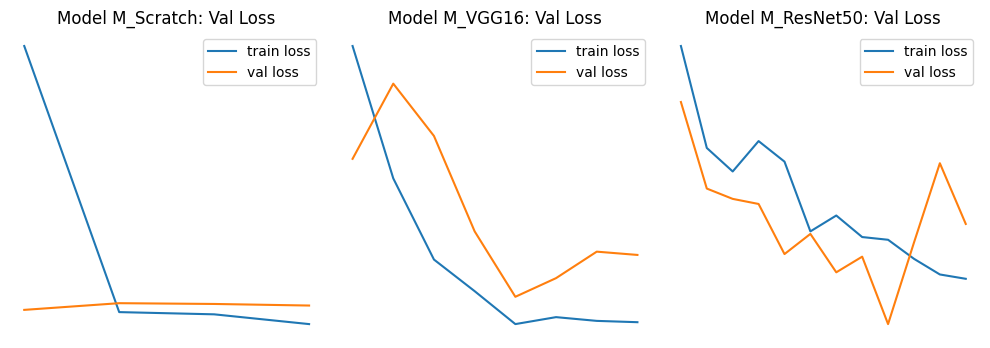

In [104]:
display_val_loss(models)

In [105]:
get_confusion_matrix(models)

--------------------Model M_Scratch--------------------
Confusion Matrix: [[150   0]
 [150   0]]
------------------------------------------------------------
--------------------Model M_VGG16--------------------
Confusion Matrix: [[150   0]
 [150   0]]
------------------------------------------------------------
--------------------Model M_ResNet50--------------------
Confusion Matrix: [[150   0]
 [150   0]]
------------------------------------------------------------


In [106]:
get_accuracy(models)

--------------------Model M_Scratch--------------------
Accuracy: 0.5
------------------------------------------------------------
--------------------Model M_VGG16--------------------
Accuracy: 0.5
------------------------------------------------------------
--------------------Model M_ResNet50--------------------
Accuracy: 0.5
------------------------------------------------------------


In [107]:
get_precision(models)

--------------------Model M_Scratch--------------------
Precision: 0.0
------------------------------------------------------------
--------------------Model M_VGG16--------------------
Precision: 0.0
------------------------------------------------------------
--------------------Model M_ResNet50--------------------
Precision: 0.0
------------------------------------------------------------


In [108]:
get_recall(models)

--------------------Model M_Scratch--------------------
Recall: 0.0
------------------------------------------------------------
--------------------Model M_VGG16--------------------
Recall: 0.0
------------------------------------------------------------
--------------------Model M_ResNet50--------------------
Recall: 0.0
------------------------------------------------------------


In [109]:
get_f1_score(models)

--------------------Model M_Scratch--------------------
F1-score: 0.0
------------------------------------------------------------
--------------------Model M_VGG16--------------------
F1-score: 0.0
------------------------------------------------------------
--------------------Model M_ResNet50--------------------
F1-score: 0.0
------------------------------------------------------------


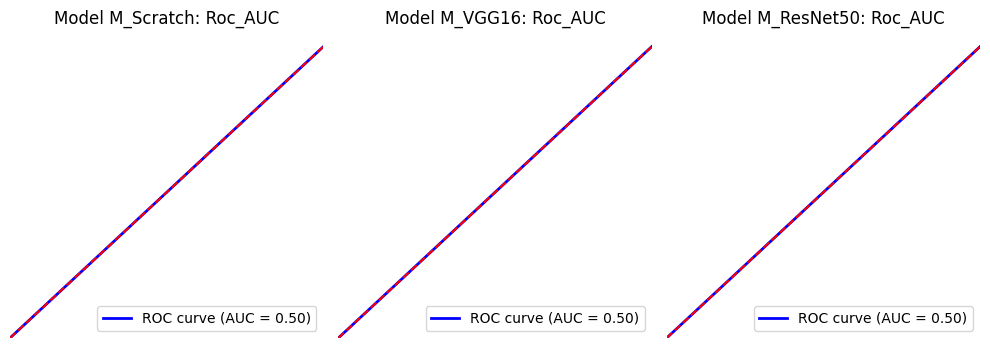

In [110]:
display_roc_auc(models)